In [14]:
 %matplotlib inline

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
seed = 7
np.random.seed(seed)

In [15]:
data = pd.read_csv('/Users/judemurphy/Project Notebooks/100days_allfeatures_5minintervals.csv')
data.head()

timestamp  blood_glucose  rapid_acting_insulin  \
0  09/01/2018 00:00           12.0                   0.0   
1  09/01/2018 00:05           11.9                   0.0   
2  09/01/2018 00:10           11.7                   0.0   
3  09/01/2018 00:15           11.3                   0.0   
4  09/01/2018 00:20           10.8                   0.0   

   carbohydrates_consumed  protein_consumed  fat_consumed  \
0                     0.0               0.0           0.0   
1                     0.0               0.0           0.0   
2                     0.0               0.0           0.0   
3                     0.0               0.0           0.0   
4                     0.0               0.0           0.0   

   long_acting_insulin  asleep_awake  active_inactive  
0                  0.0             0                0  
1                  0.0             0                0  
2                  0.0             0                0  
3                  0.0             0                0  
4                  0.0             0                0

In [16]:
data

timestamp  blood_glucose  rapid_acting_insulin  \
0      09/01/2018 00:00           12.0                   0.0   
1      09/01/2018 00:05           11.9                   0.0   
2      09/01/2018 00:10           11.7                   0.0   
3      09/01/2018 00:15           11.3                   0.0   
4      09/01/2018 00:20           10.8                   0.0   
5      09/01/2018 00:25           10.4                   0.0   
6      09/01/2018 00:30           10.3                   0.0   
7      09/01/2018 00:35           10.2                   0.0   
8      09/01/2018 00:40            8.9                   0.0   
9      09/01/2018 00:45            8.4                   0.0   
10     09/01/2018 00:50            8.0                   0.0   
11     09/01/2018 00:55            7.5                   0.0   
12     09/01/2018 01:00            6.3                   0.0   
13     09/01/2018 01:05            5.1                   0.0   
14     09/01/2018 01:10            4.3                   0.0   
15     09/01/2018 01:15            4.3                   0.0   
16     09/01/2018 01:20            4.3                   0.0   
17     09/01/2018 01:25            4.2                   0.0   
18     09/01/2018 01:30            4.2                   0.0   
19     09/01/2018 01:35            4.2                   0.0   
20     09/01/2018 01:40            4.2                   0.0   
21     09/01/2018 01:45            4.2                   0.0   
22     09/01/2018 01:50            4.1                   0.0   
23     09/01/2018 01:55            4.1                   0.0   
24     09/01/2018 02:00            4.1                   0.0   
25     09/01/2018 02:05            4.1                   0.0   
26     09/01/2018 02:10            4.0                   0.0   
27     09/01/2018 02:15            4.0                   0.0   
28     09/01/2018 02:20            4.0                   0.0   
29     09/01/2018 02:25            4.0                   0.0   
...                 ...            ...                   ...   
28770  12/09/2018 21:30           10.9                   0.0   
28771  12/09/2018 21:35           11.0                   0.0   
28772  12/09/2018 21:40           11.2                   0.0   
28773  12/09/2018 21:45           10.1                   0.0   
28774  12/09/2018 21:50           10.1                   0.0   
28775  12/09/2018 21:55           10.2                   0.0   
28776  12/09/2018 22:00            9.9                   0.0   
28777  12/09/2018 22:05            9.7                   0.0   
28778  12/09/2018 22:10            9.4                   4.0   
28779  12/09/2018 22:15            9.5                   0.0   
28780  12/09/2018 22:20            9.5                   0.0   
28781  12/09/2018 22:25            9.6                   0.0   
28782  12/09/2018 22:30            9.9                   0.0   
28783  12/09/2018 22:35           10.3                   0.0   
28784  12/09/2018 22:40           10.6                   0.0   
28785  12/09/2018 22:45           10.8                   0.0   
28786  12/09/2018 22:50           11.1                   0.0   
28787  12/09/2018 22:55           11.3                   0.0   
28788  12/09/2018 23:00           11.1                   0.0   
28789  12/09/2018 23:05           10.8                   0.0   
28790  12/09/2018 23:10           10.6                   0.0   
28791  12/09/2018 23:15            9.1                   0.0   
28792  12/09/2018 23:20            8.6                   0.0   
28793  12/09/2018 23:25            8.1                   0.0   
28794  12/09/2018 23:30            7.6                   0.0   
28795  12/09/2018 23:35            7.0                   0.0   
28796  12/09/2018 23:40            6.5                   0.0   
28797  12/09/2018 23:45            6.3                   0.0   
28798  12/09/2018 23:50            6.1                   0.0   
28799  12/09/2018 23:55            5.9                   0.0   

       carbohydrates_consumed  protein_consum

In [17]:
data.isna().any()

timestamp                 False
blood_glucose             False
rapid_acting_insulin      False
carbohydrates_consumed    False
protein_consumed          False
fat_consumed              False
long_acting_insulin       False
asleep_awake              False
active_inactive           False
dtype: bool

In [18]:
data.timestamp = pd.to_datetime(data.timestamp)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 9 columns):
timestamp                 28800 non-null datetime64[ns]
blood_glucose             28800 non-null float64
rapid_acting_insulin      28800 non-null float64
carbohydrates_consumed    28800 non-null float64
protein_consumed          28800 non-null float64
fat_consumed              28800 non-null float64
long_acting_insulin       28800 non-null float64
asleep_awake              28800 non-null int64
active_inactive           28800 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 2.0 MB


In [20]:
data = data.set_index('timestamp')

In [21]:
data

blood_glucose  rapid_acting_insulin  \
timestamp                                                  
2018-09-01 00:00:00           12.0                   0.0   
2018-09-01 00:05:00           11.9                   0.0   
2018-09-01 00:10:00           11.7                   0.0   
2018-09-01 00:15:00           11.3                   0.0   
2018-09-01 00:20:00           10.8                   0.0   
2018-09-01 00:25:00           10.4                   0.0   
2018-09-01 00:30:00           10.3                   0.0   
2018-09-01 00:35:00           10.2                   0.0   
2018-09-01 00:40:00            8.9                   0.0   
2018-09-01 00:45:00            8.4                   0.0   
2018-09-01 00:50:00            8.0                   0.0   
2018-09-01 00:55:00            7.5                   0.0   
2018-09-01 01:00:00            6.3                   0.0   
2018-09-01 01:05:00            5.1                   0.0   
2018-09-01 01:10:00            4.3                   0.0   
2018-09-01 01:15:00            4.3                   0.0   
2018-09-01 01:20:00            4.3                   0.0   
2018-09-01 01:25:00            4.2                   0.0   
2018-09-01 01:30:00            4.2                   0.0   
2018-09-01 01:35:00            4.2                   0.0   
2018-09-01 01:40:00            4.2                   0.0   
2018-09-01 01:45:00            4.2                   0.0   
2018-09-01 01:50:00            4.1                   0.0   
2018-09-01 01:55:00            4.1                   0.0   
2018-09-01 02:00:00            4.1                   0.0   
2018-09-01 02:05:00            4.1                   0.0   
2018-09-01 02:10:00            4.0                   0.0   
2018-09-01 02:15:00            4.0                   0.0   
2018-09-01 02:20:00            4.0                   0.0   
2018-09-01 02:25:00            4.0                   0.0   
...                            ...                   ...   
2018-12-09 21:30:00           10.9                   0.0   
2018-12-09 21:35:00           11.0                   0.0   
2018-12-09 21:40:00           11.2                   0.0   
2018-12-09 21:45:00           10.1                   0.0   
2018-12-09 21:50:00           10.1                   0.0   
2018-12-09 21:55:00           10.2                   0.0   
2018-12-09 22:00:00            9.9                   0.0   
2018-12-09 22:05:00            9.7                   0.0   
2018-12-09 22:10:00            9.4                   4.0   
2018-12-09 22:15:00            9.5                   0.0   
2018-12-09 22:20:00            9.5                   0.0   
2018-12-09 22:25:00            9.6                   0.0   
2018-12-09 22:30:00            9.9                   0.0   
2018-12-09 22:35:00           10.3                   0.0   
2018-12-09 22:40:00           10.6                   0.0   
2018-12-09 22:45:00           10.8                   0.0   
2018-12-09 22:50:00           11.1                   0.0   
2018-12-09 22:55:00           11.3                   0.0   
2018-12-09 23:00:00           11.1                   0.0   
2018-12-09 23:05:00           10.8                   0.0   
2018-12-09 23:10:00           10.6                   0.0   
2018-12-09 23:15:00            9.1                   0.0   
2018-12-09 23:20:00            8.6                   0.0   
2018-12-09 23:25:00            8.1                   0.0   
2018-12-09 23:30:00            7.6                   0.0   
2018-12-09 23:35:00            7.0                   0.0   
2018-12-09 23:40:00            6.5                   0.0   
2018-12-09 23:45:00            6.3                   0.0   
2018-12-09 23:50:00            6.1                   0.0   
2018-12-09 23:55:00            5.9                   0.0   

                     carbohydrates_consumed  protein_consumed  fat_consumed  \
timestamp                                                                     
2018-09-01 00:00:00                     0.0               0.0           0.0   
201

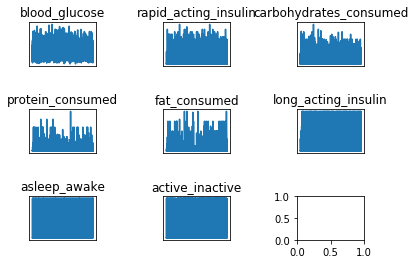

In [25]:
#Preparing the data to be modelled as supervised learning problem
groups = [0, 1, 2, 3, 4, 5, 6, 7]
values = data.values
fig,sub = plt.subplots(3,3)
plt.subplots_adjust(wspace=1, hspace=1)

for ax, i in zip(sub.flatten(),groups):
    ax.plot(values[:,i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(data.columns[i])

In [26]:
#Normalising the data between a range of 0 and 1 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled[0]

array([0.46969697, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [27]:
scaled

array([[0.46969697, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46464646, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45454545, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18181818, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.17171717, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16161616, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [28]:
#Representing the data as a supervised machine learning problem
#With the input values(X) being the 60 mins of feature data and the output(Y) being the blood glucose after that 60 mins
def to_supervised(data,dropNa = True,lag = 1):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    features = data.shape[1]
    df = df.values
    supervised_data = df[:,:features*lag]
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    return supervised_data

In [29]:
pd.set_option('display.max_columns', None)
import numpy as np 
timeSteps = 12 #Note timesteps = 12 as this is 60 minutes 

supervised = to_supervised(scaled,lag=timeSteps)
pd.DataFrame(supervised)

0     1     2     3     4    5    6    7         8     9     10  \
0      0.469697  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.464646  0.00  0.00   
1      0.464646  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.454545  0.00  0.00   
2      0.454545  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.434343  0.00  0.00   
3      0.434343  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.409091  0.00  0.00   
4      0.409091  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.388889  0.00  0.00   
5      0.388889  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.383838  0.00  0.00   
6      0.383838  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.378788  0.00  0.00   
7      0.378788  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.313131  0.00  0.00   
8      0.313131  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.287879  0.00  0.00   
9      0.287879  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.267677  0.00  0.00   
10     0.267677  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.242424  0.00  0.00   
11     0.242424  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.181818  0.00  0.00   
12     0.181818  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.121212  0.00  0.00   
13     0.121212  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.080808  0.00  0.00   
14     0.080808  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.080808  0.00  0.00   
15     0.080808  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.080808  0.00  0.00   
16     0.080808  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.075758  0.00  0.00   
17     0.075758  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.075758  0.00  0.00   
18     0.075758  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.075758  0.00  0.00   
19     0.075758  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.075758  0.00  0.00   
20     0.075758  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.075758  0.00  0.00   
21     0.075758  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.070707  0.00  0.00   
22     0.070707  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.070707  0.00  0.00   
23     0.070707  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.070707  0.00  0.00   
24     0.070707  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.070707  0.00  0.00   
25     0.070707  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.065657  0.00  0.00   
26     0.065657  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.065657  0.00  0.00   
27     0.065657  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.065657  0.00  0.00   
28     0.065657  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.065657  0.00  0.00   
29     0.065657  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.065657  0.00  0.00   
...         ...   ...   ...   ...   ...  ...  ...  ...       ...   ...   ...   
28758  0.489899  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.494949  0.00  0.00   
28759  0.494949  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.500000  0.00  0.00   
28760  0.500000  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.464646  0.00  0.00   
28761  0.464646  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.459596  0.00  0.00   
28762  0.459596  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.449495  0.00  0.00   
28763  0.449495  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.444444  0.00  0.00   
28764  0.444444  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.439394  0.00  0.00   
28765  0.439394  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.434343  0.00  0.00   
28766  0.434343  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.424242  0.00  0.00   
28767  0.424242  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.414141  0.00  0.00   
28768  0.414141  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.404040  0.00  0.00   
28769  0.404040  0.00  0.00  0.00  0.00  1.0  0.0  0.0  0.414141  0.00  0.00   
28770  0.414141  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.419192  0.00  0.00   
28771  0.419192  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.429293  0.00  0.00   
28772  0.429293  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.373737  0.00  0.00   
28773  0.373737  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.373737  0.00  0.00   
28774  0.373737  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.378788  0.00  0.00   
28775  0.378788  0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.363636  0.00  0.00   
28776  0.3636

In [31]:
# spiltting the data
# training on only first 70 days 
features = data.shape[1]
train_intervals = 20160
X = supervised[:,:features*timeSteps]
y = supervised[:,features*timeSteps]

x_train = X[:train_intervals,:]
x_test = X[train_intervals:,:]
y_train = y[:train_intervals]
y_test = y[train_intervals:]

print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20160, 96) (8628, 96) (20160,) (8628,)


In [32]:
x_train

array([[0.46969697, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46464646, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45454545, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33838384, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.28787879, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27777778, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [33]:
x_test

array([[0.25252525, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1969697 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.40909091, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.42424242, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.43434343, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [34]:
y_train

array([0.18181818, 0.12121212, 0.08080808, ..., 0.23737374, 0.28282828,
       0.33333333])

In [35]:
y_test

array([0.32323232, 0.31818182, 0.30808081, ..., 0.18181818, 0.17171717,
       0.16161616])

In [36]:
#convert data to fit for lstm
#dimensions = (sample, timeSteps here it is 12, features )

x_train = x_train.reshape(x_train.shape[0], timeSteps, features)
x_test = x_test.reshape(x_test.shape[0], timeSteps, features)

print (x_train.shape,x_test.shape)

(20160, 12, 8) (8628, 12, 8)


In [37]:
x_train

array([[[0.46969697, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.46464646, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.45454545, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.28787879, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.26767677, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.24242424, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.46464646, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.45454545, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.43434343, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.26767677, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.2

In [38]:
x_test

array([[[0.25252525, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.22222222, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.1969697 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        ...,
        [0.23737374, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.28282828, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.33333333, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ]],

       [[0.22222222, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.1969697 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.2020202 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        ...,
        [0.28282828, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.3

In [39]:
y_test.shape

(8628,)

In [40]:
##Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [41]:
#define the model

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

model = Sequential()
#We can see here that the input shape is 12, 8 - meaning every short term memory cell takes in 12 timesteps 
#worth of the dataset and the eight features.
#We have 50 epochs, so different training sessions to go back into the network and try and improve it
model.add( LSTM( 50, input_shape = ( timeSteps,x_train.shape[2]) ) )
model.add( Dense(1) )

model.compile( loss = "mae", optimizer = "adam")

history = model.fit( x_train,y_train, validation_data = (x_test,y_test), epochs = 50 , batch_size = 72, verbose = 2, shuffle = False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20160 samples, validate on 8628 samples
Epoch 1/50
 - 4s - loss: 0.0571 - val_loss: 0.0313
Epoch 2/50
 - 3s - loss: 0.0327 - val_loss: 0.0231
Epoch 3/50
 - 3s - loss: 0.0269 - val_loss: 0.0184
Epoch 4/50
 - 3s - loss: 0.0234 - val_loss: 0.0160
Epoch 5/50
 - 4s - loss: 0.0205 - val_loss: 0.0142
Epoch 6/50
 - 4s - loss: 0.0185 - val_loss: 0.0150
Epoch 7/50
 - 3s - loss: 0.0171 - val_loss: 0.0122
Epoch 8/50
 - 3s - loss: 0.0156 - val_loss: 0.0168
Epoch 9/50
 - 3s - loss: 0.0146 - val_loss: 0.0119
Epoch 10/50
 - 3s - loss: 0.0139 - val_loss: 0.0102
Epoch 11/50
 - 3s - loss: 0.0135 - val_loss: 0.0095
Epoch 12/50
 - 3s - loss: 0.0131 - val_loss: 0.0113
Epoch 13/50
 - 3s - loss: 0.0130 - val_loss: 0.0109
Epoch 14/50
 - 3s - loss: 0.0128 - val_loss: 0.0100
Epoch 15/50
 - 3s - loss: 0.0127 - val_loss: 0.0102
Epoch 16/50
 - 3s - loss: 0.0127 - val_loss: 0.0102
Epoch 17

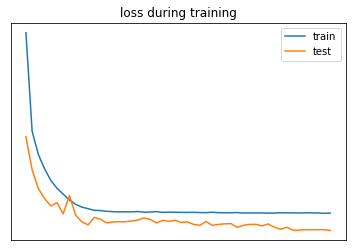

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.yticks([])
plt.xticks([])
plt.title("loss during training")
plt.show()

In [43]:
x_test

array([[[0.25252525, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.22222222, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.1969697 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        ...,
        [0.23737374, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.28282828, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.33333333, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ]],

       [[0.22222222, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.1969697 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.2020202 , 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        ...,
        [0.28282828, 0.        , 0.        , ..., 0.        ,
         1.        , 0.        ],
        [0.3

In [44]:
#scale back the prediction to orginal scale
y_pred = model.predict(x_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[2]*x_test.shape[1])

#Concatenating prediction with 7 columns of the x_test to allow for scaling back to original range of data
#scaler only takes an input which is 8 columns
inv_new = np.concatenate( (y_pred, x_test[:,-7:] ) , axis =1)
inv_new = scaler.inverse_transform(inv_new)
#This is us slicing the array and using only the blood sugar reading for the final predictions
final_pred = inv_new[:,0]

y_test = y_test.reshape( len(y_test), 1)
#Same as above
inv_new = np.concatenate( (y_test, x_test[:,-7:] ) ,axis = 1)
inv_new = scaler.inverse_transform(inv_new)
actual_pred = inv_new[:,0]

In [45]:
actual_pred

array([9.1, 9. , 8.8, ..., 6.3, 6.1, 5.9])

In [46]:
final_pred

array([10.12103816,  9.0823163 ,  8.910927  , ...,  6.0860547 ,
        6.11783112,  5.95637976])

In [47]:
np.round_(final_pred, decimals=1, out=None)

array([10.1,  9.1,  8.9, ...,  6.1,  6.1,  6. ])

In [48]:
final_pred = np.round_(final_pred, decimals=1, out = None)

In [49]:
final_pred

array([10.1,  9.1,  8.9, ...,  6.1,  6.1,  6. ])

In [50]:
bg_pred = pd.DataFrame(final_pred)
bg_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 1 columns):
0    8628 non-null float64
dtypes: float64(1)
memory usage: 67.5 KB


In [51]:
bg_actual = pd.DataFrame(actual_pred)
bg_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 1 columns):
0    8628 non-null float64
dtypes: float64(1)
memory usage: 67.5 KB


In [52]:
bg_actual

0
0      9.1
1      9.0
2      8.8
3      9.1
4      9.4
5      9.7
6     10.7
7     11.3
8     12.0
9     11.6
10    11.2
11    10.9
12    11.0
13    11.2
14    11.3
15    11.4
16    11.4
17    11.5
18    11.6
19    11.6
20    11.6
21    11.7
22    11.7
23    11.7
24    11.7
25    11.6
26    11.5
27    11.4
28    11.6
29    11.7
...    ...
8598  10.9
8599  11.0
8600  11.2
8601  10.1
8602  10.1
8603  10.2
8604   9.9
8605   9.7
8606   9.4
8607   9.5
8608   9.5
8609   9.6
8610   9.9
8611  10.3
8612  10.6
8613  10.8
8614  11.1
8615  11.3
8616  11.1
8617  10.8
8618  10.6
8619   9.1
8620   8.6
8621   8.1
8622   7.6
8623   7.0
8624   6.5
8625   6.3
8626   6.1
8627   5.9

[8628 rows x 1 columns]

In [53]:
bg_pred

0
0     10.1
1      9.1
2      8.9
3      8.7
4      9.4
5      9.7
6     10.0
7     11.5
8     11.9
9     12.6
10    11.4
11    10.9
12    10.7
13    11.1
14    11.4
15    11.4
16    11.5
17    11.4
18    11.6
19    11.7
20    11.6
21    11.6
22    11.8
23    11.7
24    11.7
25    11.7
26    11.6
27    11.4
28    11.4
29    11.8
...    ...
8598  10.6
8599  11.0
8600  11.1
8601  11.4
8602   9.4
8603  10.0
8604  10.3
8605   9.7
8606   9.5
8607   9.2
8608   9.6
8609   9.5
8610   9.7
8611  10.1
8612  10.6
8613  10.9
8614  11.0
8615  11.3
8616  11.5
8617  11.0
8618  10.6
8619  10.5
8620   8.1
8621   8.1
8622   7.7
8623   7.2
8624   6.6
8625   6.1
8626   6.1
8627   6.0

[8628 rows x 1 columns]

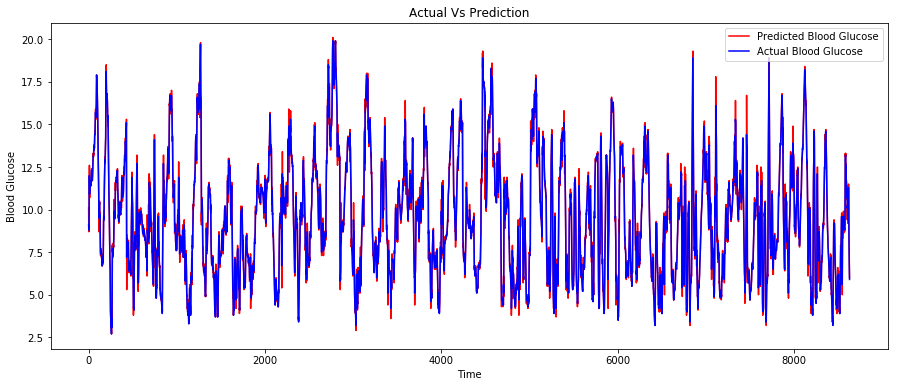

In [54]:
# Visualising the results
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(bg_pred, color = 'red', label = 'Predicted Blood Glucose')
plt.plot(bg_actual, color = 'blue', label = 'Actual Blood Glucose')
plt.title('Actual Vs Prediction')
plt.xlabel('Time')
plt.ylabel('Blood Glucose')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
#calculate RMSE
rmse = sqrt(mean_squared_error(final_pred, actual_pred))
print('Test RMSE: %.4f' % rmse)

Test RMSE: 0.2841


In [56]:
from keras.models import load_model

model.save('my_60minlstm_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model